In this Jupiter Notebook, we will see how we can collect data and label the data for object detection using python. We will be doing this end to end on colab environment.

Help is available on "https://www.youtube.com/watch?v=XhY-VdmSIUQ"

##install "google-image-download"

In [1]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-uy246tbs
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-uy246tbs
     |████████████████████████████████| 911kB 5.8MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15793 sha256=011c45aa3285efe4ed0831d884067925f0e8dc22f6e58985ad81b16392bf5358
  Stored in directory: /tmp/pip-ephem-wheel-cache-l3oc_qyj/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [2]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()

In [4]:
arguments = {"keywords":"alone polar bear in artic","limit":6,"format":"jpg","print_urls":True}
paths = response.download(arguments)


Item no.: 1 --> Item name = alone polar bear in artic
Evaluating...
Starting Download...
Image URL: https://inhabitat.com/wp-content/blogs.dir/1/files/2015/09/polar-bear-tragedy-svalbard-norway-1.jpg
Completed Image ====> 1.polar-bear-tragedy-svalbard-norway-1.jpg
Image URL: https://i.pinimg.com/originals/cc/e3/53/cce35385b8c494308322e5af9c272332.jpg
Completed Image ====> 2.cce35385b8c494308322e5af9c272332.jpg
Image URL: https://www.arctictoday.com/wp-content/uploads/2018/08/Polar_Bear_AdF.jpg
Completed Image ====> 3.polar_bear_adf.jpg
Image URL: https://www.pbs.org/wgbh/nova/media/images/tagged_bear.width-800.jpg
Completed Image ====> 4.tagged_bear.width-800.jpg
Image URL: https://e360.yale.edu/assets/site/TimAuer_4b.io_Churchill_141103__MG_0126-cs6-4_web2.jpg
Completed Image ====> 5.timauer_4b.io_churchill_141103__mg_0126-cs6-4_web2.jpg
Image URL: https://www.auroraexpeditions.com.au/wp-content/uploads/2020/02/are-there-polar-bears-in-antarctica.jpg
Completed Image ====> 6.are-there

In [5]:
!ls downloads/'alone polar bear in artic'

1.polar-bear-tragedy-svalbard-norway-1.jpg
2.cce35385b8c494308322e5af9c272332.jpg
3.polar_bear_adf.jpg
4.tagged_bear.width-800.jpg
5.timauer_4b.io_churchill_141103__mg_0126-cs6-4_web2.jpg
6.are-there-polar-bears-in-antarctica.jpg


In [6]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2324, done.
remote: Counting objects: 100% (2324/2324), done.
remote: Compressing objects: 100% (2026/2026), done.
remote: Total 2324 (delta 563), reused 915 (delta 273), pack-reused 0
Receiving objects: 100% (2324/2324), 30.65 MiB | 28.80 MiB/s, done.
Resolving deltas: 100% (563/563), done.


In [7]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1606783 sha256=290169ccfc45e14938527078bf93b0c4a980b306a864740d9dad1409029e6cec
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ue6_tgy/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.1-cp36-none-any.whl size=43734 sha256=7f32d787b4e824cd5844376caedfca600cd29932718646fbf5756b14d3383680
  Stored in directory: /root/.cache/pip/wheels/65/fe/90/20d6d6d97223d80d20cb390be636619c536edab5658c12bdba
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=25b8d4a24df510ae81a7ceeb64c9201ff0f51a02745cfb85613b96100f2133ba
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for hdfs: filename=hdfs-2.5.8-cp36-none-any.whl size=33213 sha256=764436fea17800762ebcf81552be5cdb687472e435292238dc0852

ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.25.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1; python_version >= "3.0", but you'll have avro-python3 1.10.1 which is incompatible.


In [8]:
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage
import glob
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)


In [11]:
polar_image_path = "/content/downloads/alone polar bear in artic/*"
polar_images_np = []
glob.glob(polar_image_path)

['/content/downloads/alone polar bear in artic/6.are-there-polar-bears-in-antarctica.jpg',
 '/content/downloads/alone polar bear in artic/5.timauer_4b.io_churchill_141103__mg_0126-cs6-4_web2.jpg',
 '/content/downloads/alone polar bear in artic/2.cce35385b8c494308322e5af9c272332.jpg',
 '/content/downloads/alone polar bear in artic/1.polar-bear-tragedy-svalbard-norway-1.jpg',
 '/content/downloads/alone polar bear in artic/4.tagged_bear.width-800.jpg',
 '/content/downloads/alone polar bear in artic/3.polar_bear_adf.jpg']

In [13]:
for iname in glob.glob(polar_image_path):
  polar_images_np.append(load_image_into_numpy_array(iname))

In [14]:
polar_images_np          #array of images

[array([[[ 75,  90, 119],
         [ 75,  90, 119],
         [ 75,  90, 119],
         ...,
         [ 77,  93, 118],
         [ 77,  93, 118],
         [ 77,  93, 118]],
 
        [[ 75,  90, 119],
         [ 75,  90, 119],
         [ 75,  90, 119],
         ...,
         [ 77,  93, 118],
         [ 76,  92, 117],
         [ 76,  92, 117]],
 
        [[ 75,  90, 119],
         [ 75,  90, 119],
         [ 75,  90, 119],
         ...,
         [ 76,  92, 117],
         [ 76,  92, 117],
         [ 76,  92, 117]],
 
        ...,
 
        [[122, 123, 127],
         [121, 122, 126],
         [121, 122, 124],
         ...,
         [138, 142, 145],
         [139, 143, 146],
         [139, 143, 146]],
 
        [[122, 123, 125],
         [122, 123, 125],
         [122, 123, 125],
         ...,
         [136, 140, 143],
         [137, 141, 144],
         [137, 141, 144]],
 
        [[123, 124, 126],
         [122, 123, 125],
         [122, 123, 125],
         ...,
         [135, 139, 142],
  

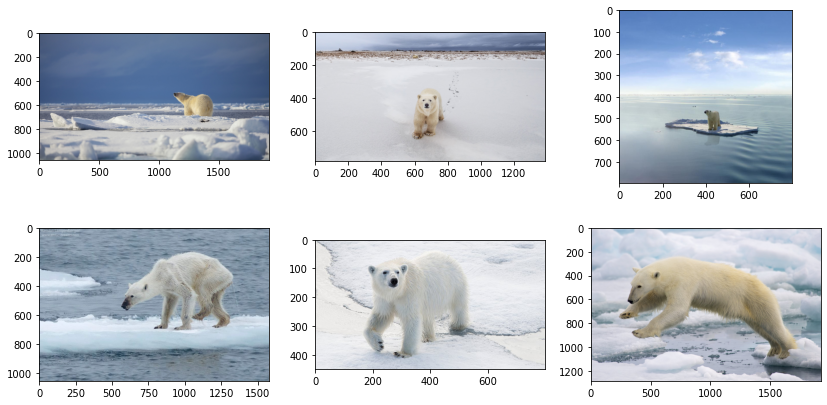

In [19]:
plt.rcParams['figure.figsize'] = [14, 7]

for idx, polar_image_np in enumerate(polar_images_np):
  plt.subplot(2, 3, idx+1)
  plt.imshow(polar_image_np)
plt.show()

In [25]:
gt_boxes = []
colab_utils.annotate(polar_images_np, box_storage_pointer=gt_boxes) #After running the current cell click right here and click on the three vertical dot -> view output full screen

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [26]:
gt_boxes

[array([[0.39333333, 0.575     , 0.69833333, 0.77916667]]),
 array([[0.395     , 0.41672675, 0.86      , 0.57534247]]),
 array([[0.55166667, 0.47875   , 0.71666667, 0.59875   ]]),
 array([[0.1       , 0.35443038, 0.77333333, 0.86329114]]),
 array([[0.05833333, 0.1875    , 0.93833333, 0.7       ]]),
 array([[0.1       , 0.103125  , 0.92666667, 0.9046875 ]])]

In [27]:
np.save("weights",gt_boxes)

In [28]:
!ls

downloads  models  sample_data	weights.npy


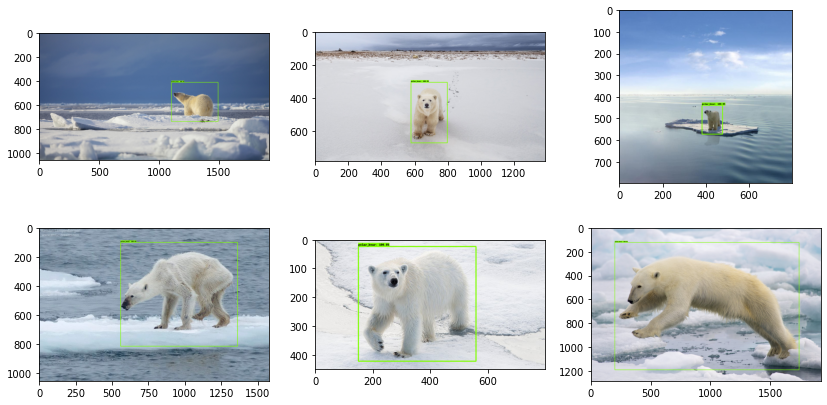

In [29]:
for idx in range(6):
  plt.subplot(2, 3, idx+1)
  image_np_with_annotations = polar_images_np[idx].copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      gt_boxes[idx],
      np.ones(shape=[gt_boxes[idx].shape[0]], dtype=np.int32),
      np.array([1.0], dtype=np.float32),
      {1: {'id': 1, 'name': 'polar_bear'}},
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  plt.imshow(image_np_with_annotations)